# PREDICTION WITH RANDOM FOREST REGRESSOR

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor

In [22]:
# read dataset may2023
df = pd.read_pickle("../../data/20230319_RTU_Dataset_PPC-Lab/df1.pkl")  

In [23]:
df

,MEM_USAGE,CPU_USAGE,TEMP
time,,,
2023-01-30 12:11:56.788,35.555417,27.343750,28.687
2023-01-30 12:16:57.191,35.555417,6.367041,28.687
2023-01-30 12:21:57.606,35.555417,7.142857,28.687
2023-01-30 12:26:58.001,35.555417,27.306273,28.687
2023-01-30 12:31:58.396,35.555417,5.639098,28.687
...,...,...,...
2023-02-09 16:53:01.209,24.758905,72.426471,32.000
2023-02-09 16:58:02.548,24.758905,22.556391,23.750
2023-02-09 17:03:03.007,24.758905,8.267717,23.750


In [24]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Using Temp to predict CPU

In [25]:
training_size = int(len(df) * 0.8)

x_train = [[i] for i in df["TEMP"]][:training_size]
y_train = [i for i in df["CPU_USAGE"]][:training_size]

x_test = [[i] for i in df["TEMP"]][training_size:]
y_test = [[i] for i in df["CPU_USAGE"]][training_size:]


In [26]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = mean_absolute_percentage_error(y_test,pred) 
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 88.38979740162013
RMSE value for k=  2 is: 84.35363176360656
RMSE value for k=  3 is: 90.87518124268465
RMSE value for k=  4 is: 78.52740173579713
RMSE value for k=  5 is: 73.48392782557981
RMSE value for k=  6 is: 67.53587302824646
RMSE value for k=  7 is: 64.64139392700598
RMSE value for k=  8 is: 62.525289404445395
RMSE value for k=  9 is: 60.585330574844754
RMSE value for k=  10 is: 58.14231081652924
RMSE value for k=  11 is: 58.09616553997624
RMSE value for k=  12 is: 59.34562364164011
RMSE value for k=  13 is: 60.10353408135497
RMSE value for k=  14 is: 58.4571334845538
RMSE value for k=  15 is: 59.8903409448175
RMSE value for k=  16 is: 58.95554096048868
RMSE value for k=  17 is: 62.676821771138925
RMSE value for k=  18 is: 65.15471345566273
RMSE value for k=  19 is: 65.17181411993924
RMSE value for k=  20 is: 72.37900043272955


<Axes: >

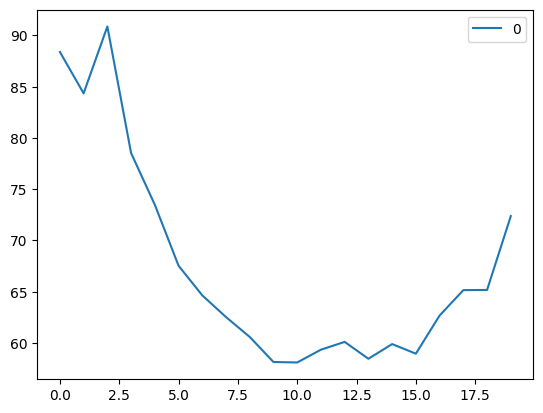

In [27]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [28]:
regressor = KNeighborsRegressor(n_neighbors=12)
regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=12)

In [29]:
Y_pred = regressor.predict(x_test)

In [30]:
print(mean_absolute_percentage_error(list(Y_pred), y_test))

79.05392632762684


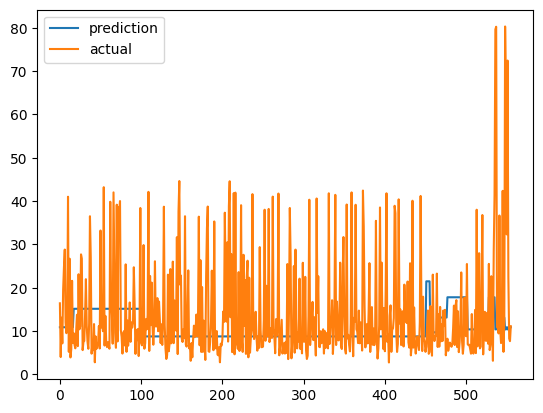

In [31]:
import matplotlib.pyplot as plt
import numpy as np

x = range(len(list(Y_pred)))
y_pred = list(Y_pred)
y_actual = y_test

plt.plot(x, y_pred, label="prediction")
plt.plot(x, y_actual, label="actual")
plt.legend()
plt.show()

### Using CPU to predict TEMP

In [34]:
training_size = int(len(df) * 0.8)

x_train = [[i] for i in df["CPU_USAGE"]][:training_size]
y_train = [i for i in df["TEMP"]][:training_size]

x_test = [[i] for i in df["CPU_USAGE"]][training_size:]
y_test = [[i] for i in df["TEMP"]][training_size:]


In [35]:
regressor = KNeighborsRegressor(n_neighbors=12)
regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=12)

In [36]:
Y_pred = regressor.predict(x_test)
print(mean_absolute_percentage_error(list(Y_pred), y_test))

15.922066362475281
